In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

path1 = 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st/'
f1 = glob.glob(path1+'*.csv')
print(len(f1))
print(f1)

f2=[]
for i in range(len(f1)):
    filename = os.path.basename(f1[i])
    root, ext = os.path.splitext(filename)
    f2.append(root)
print(f2)

10
['C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071801_36_47_water_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071802_36_47_etoh10_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071803_36_47_etoh20_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071804_36_47_etoh30_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071805_36_47_etoh40_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071806_36_95_water_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071807_36_95_etoh10r_N2N2_5s5s20step.csv', 'C:/Users/gaku1/Documents/Alliance/NIMS/VariationCheck__ChC1toC4/module36/1st\\2018071808_36_95_etoh20_N2N2_5s5s20step.csv

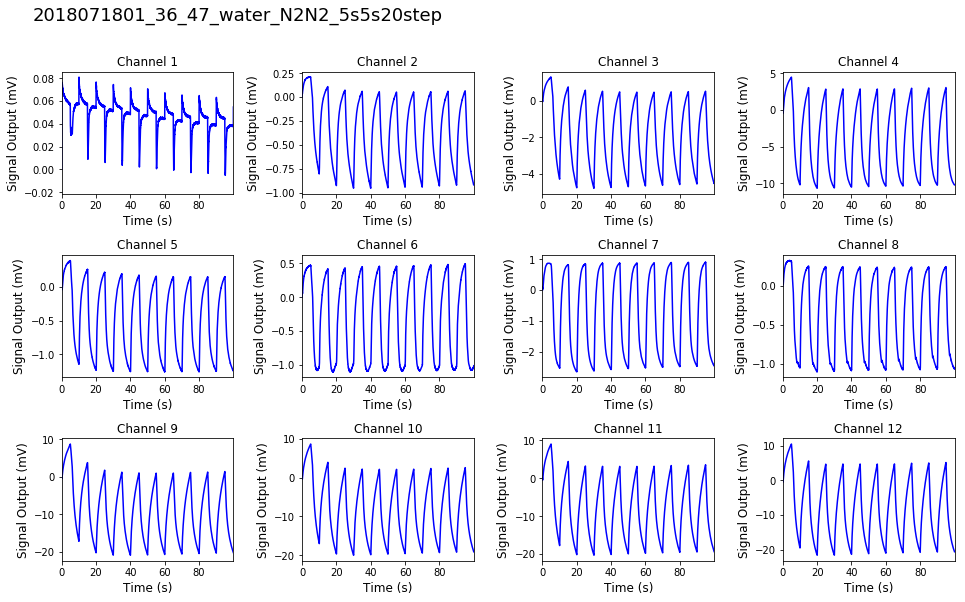

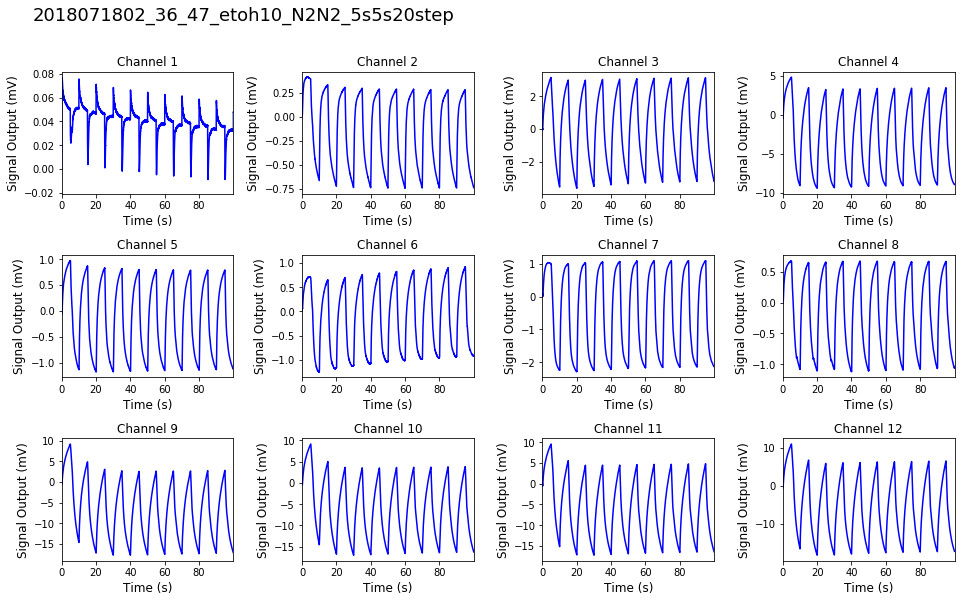

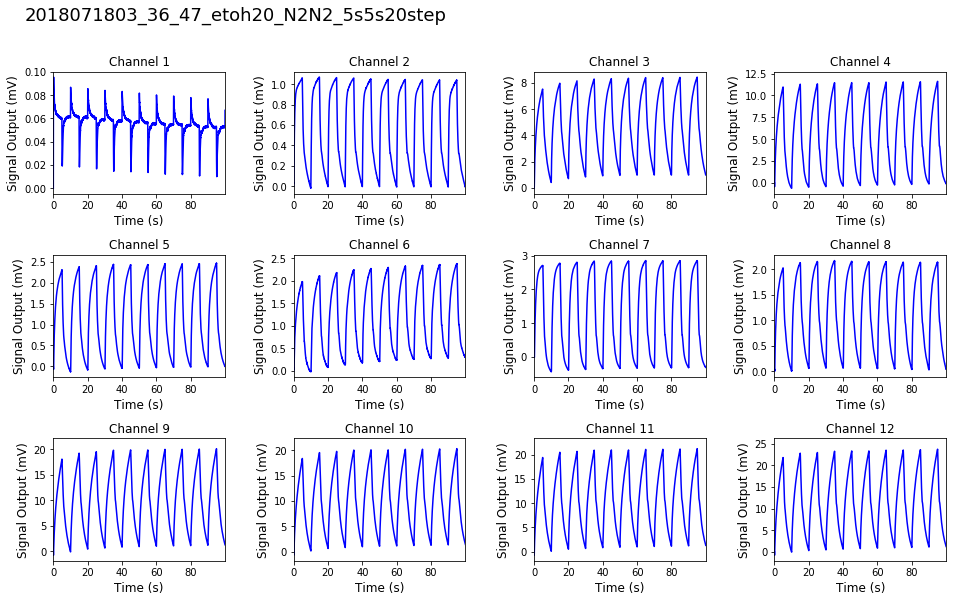

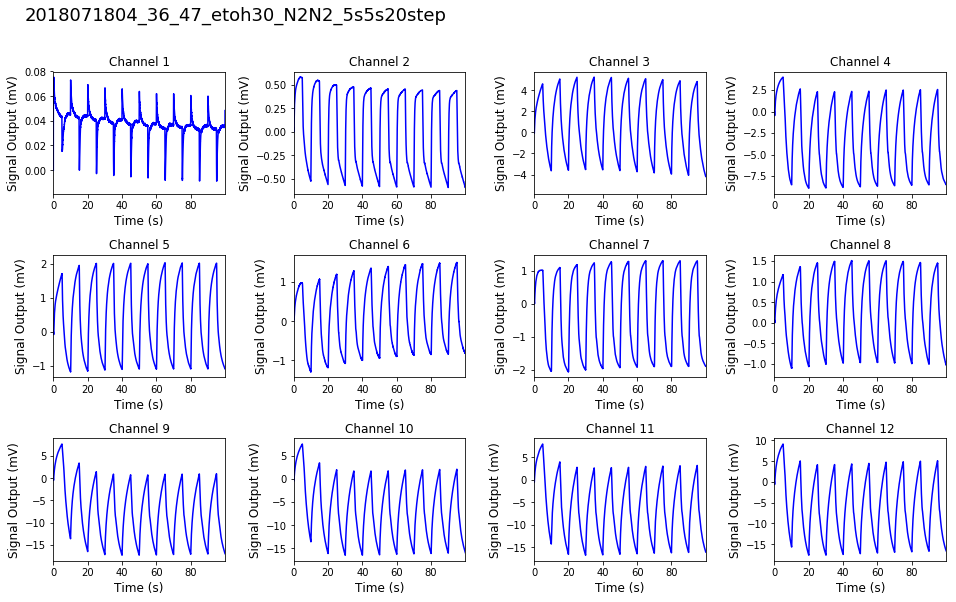

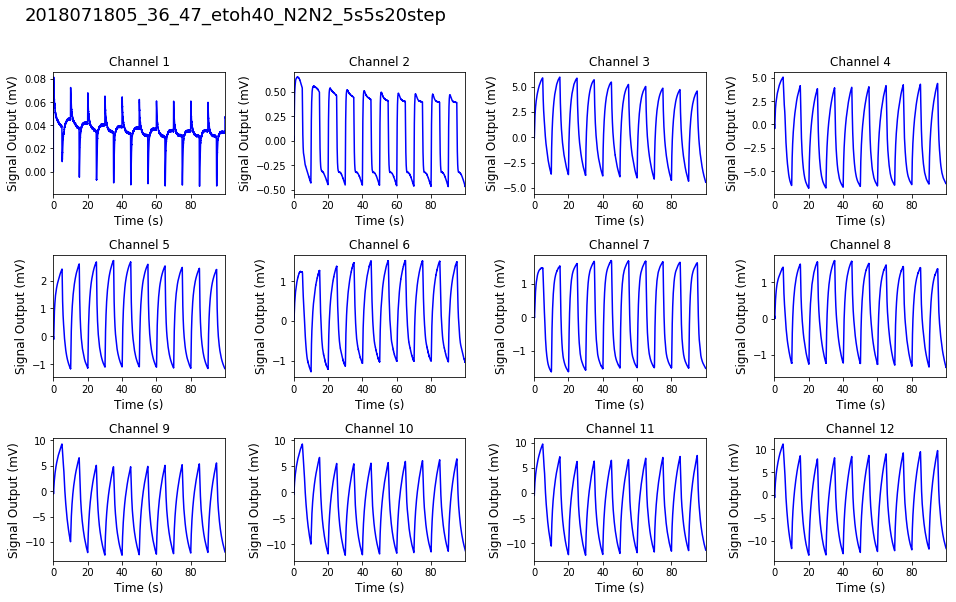

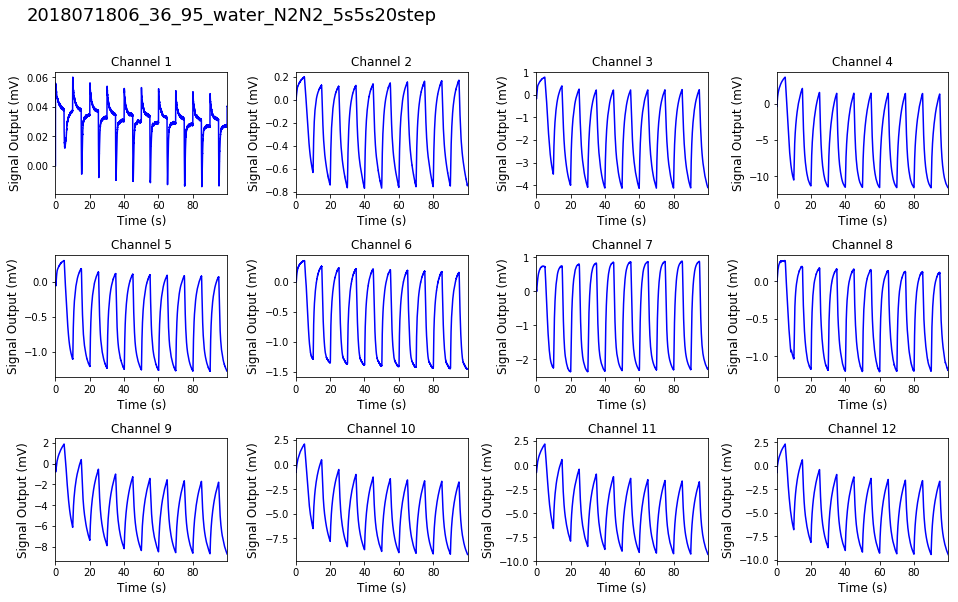

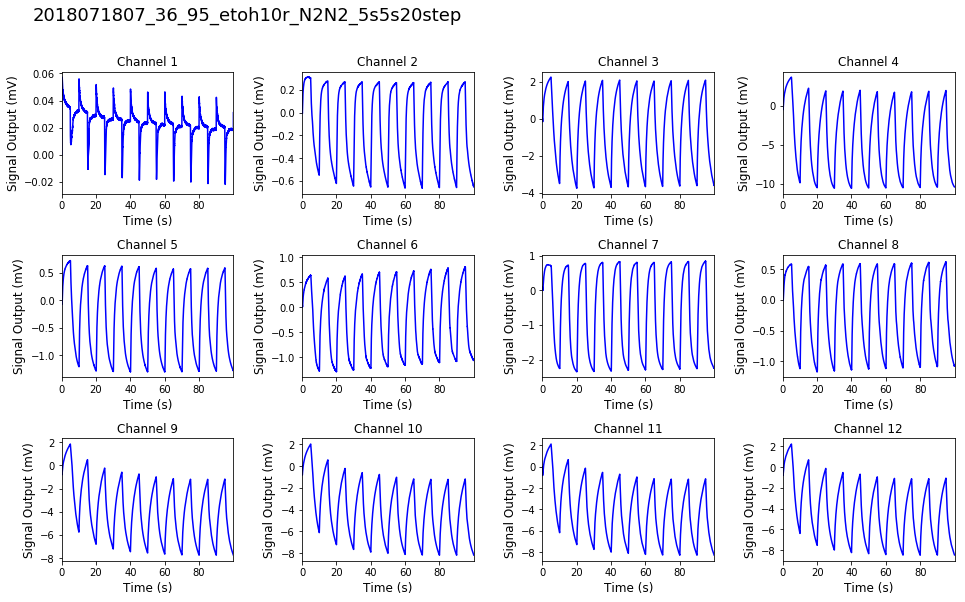

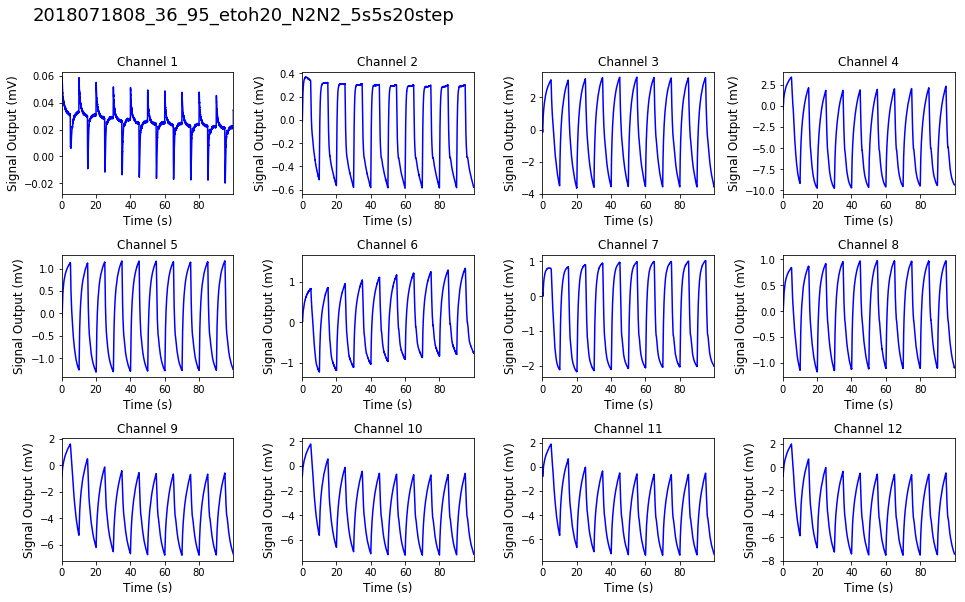

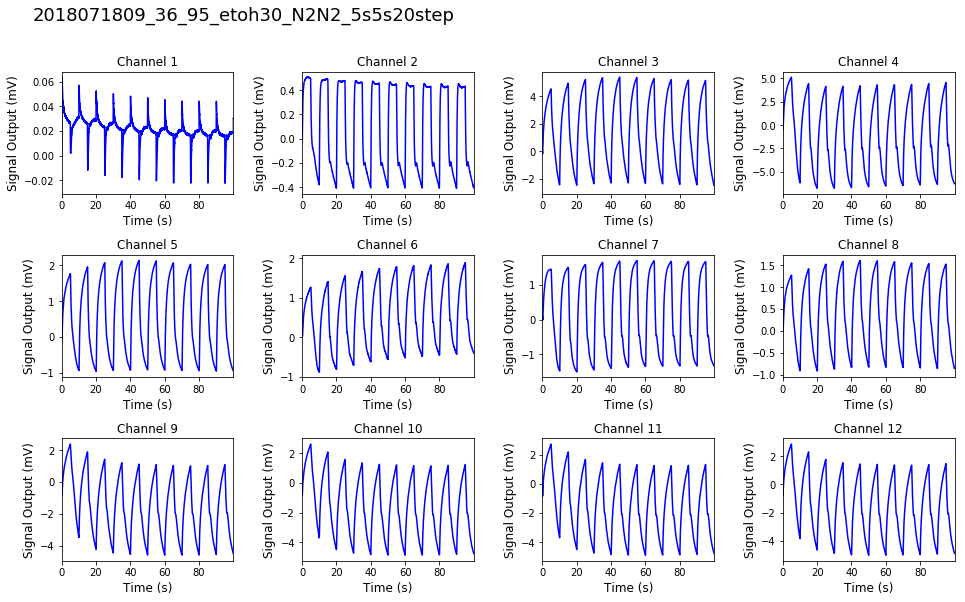

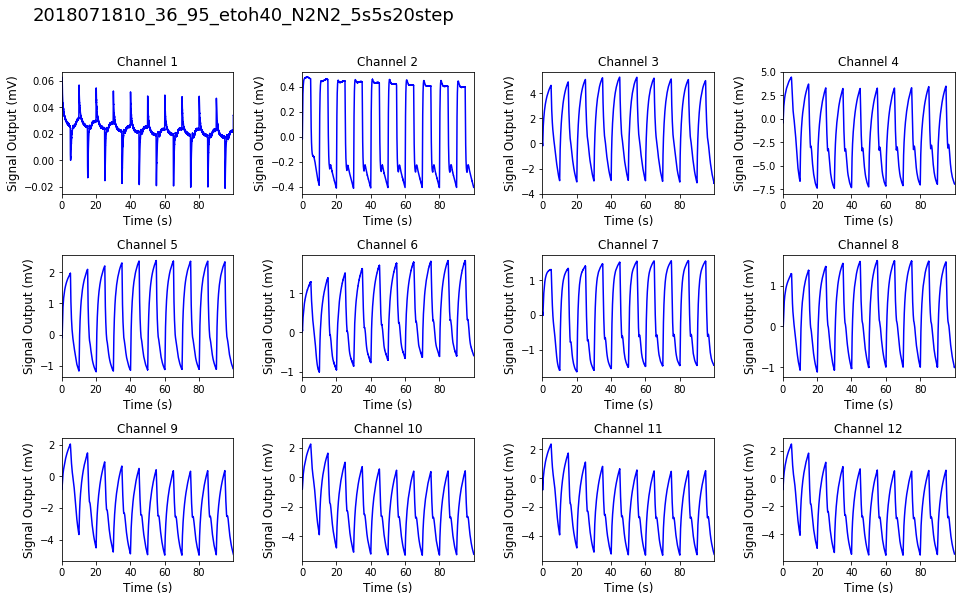

In [13]:
fontsize1=12
labelsize=10

for k in range(len(f1)):
    df = pd.read_csv(f1[k], skiprows=19, nrows=19999)

    fig = plt.figure(figsize=(16,9))
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    x = df.iloc[:,0]
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title('Channel '+str(i+1), fontsize=12)
        plt.plot(x,df.iloc[:,i+1]-df.iloc[0,i+1], 'b')
        plt.xlabel('Time (s)', fontsize=fontsize1)
        plt.ylabel('Signal Output (mV)', fontsize=fontsize1)
        plt.xlim([0,100])
        plt.tick_params(labelsize =labelsize)
        plt.xticks(np.arange(0,100,20))
    fig.suptitle(f2[k], ha='left', x=0.1, fontsize=18)
    plt.savefig(path1+f2[k]+'.png', format='png')
    plt.show()

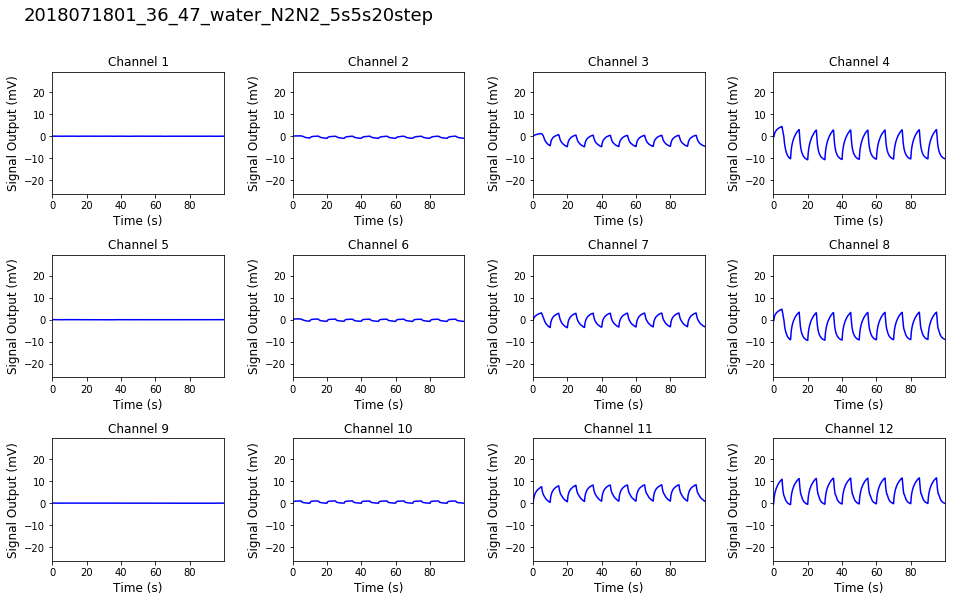

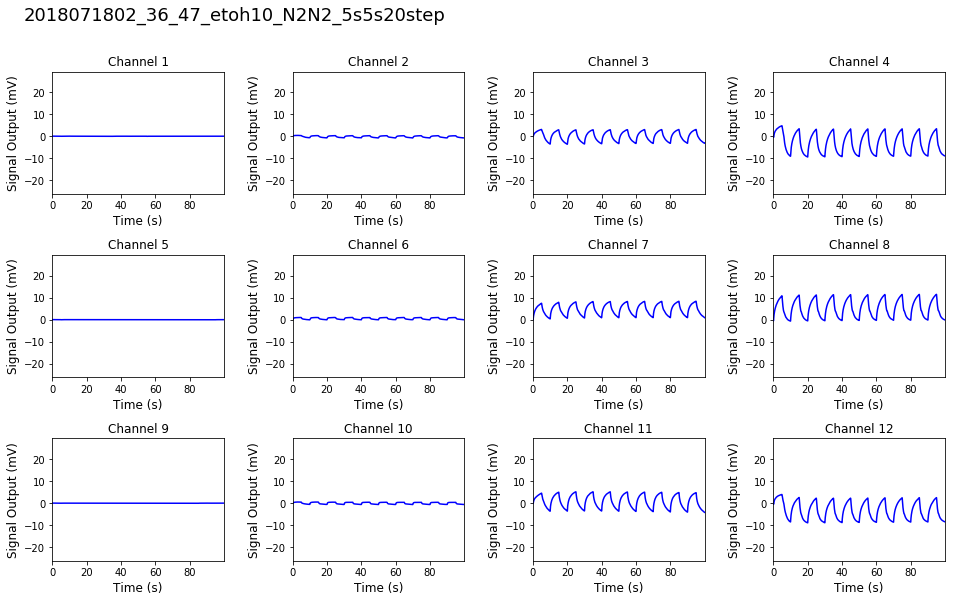

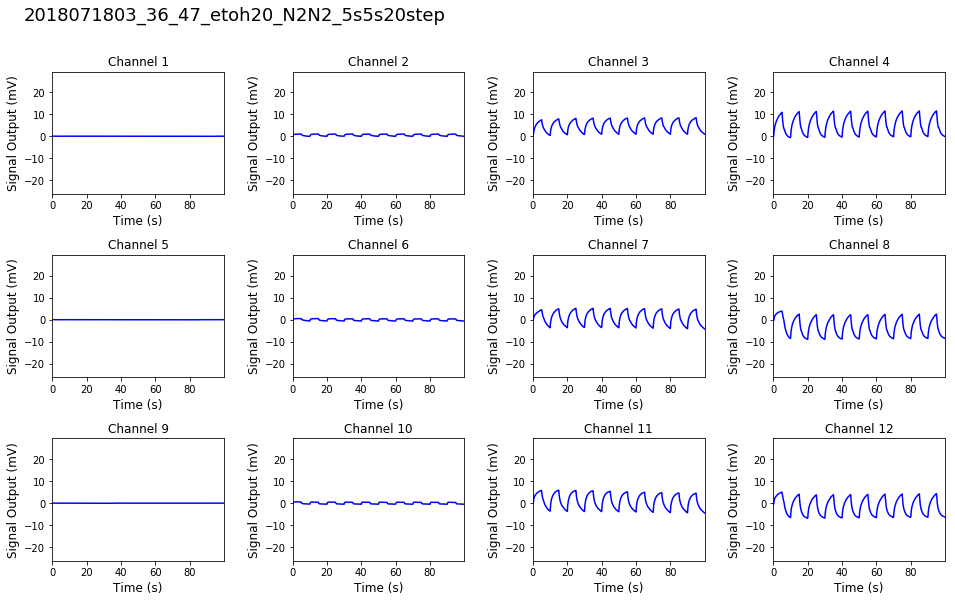

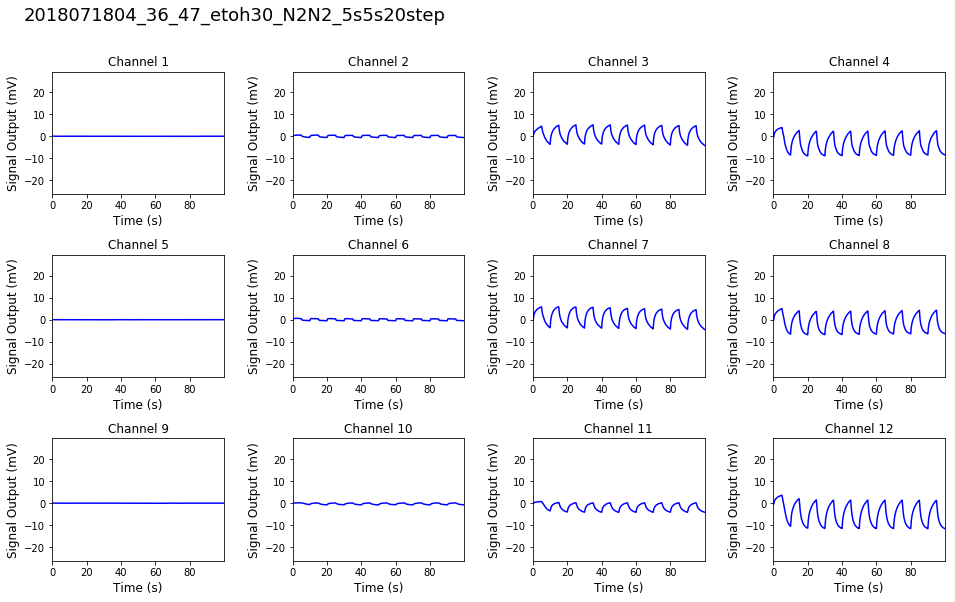

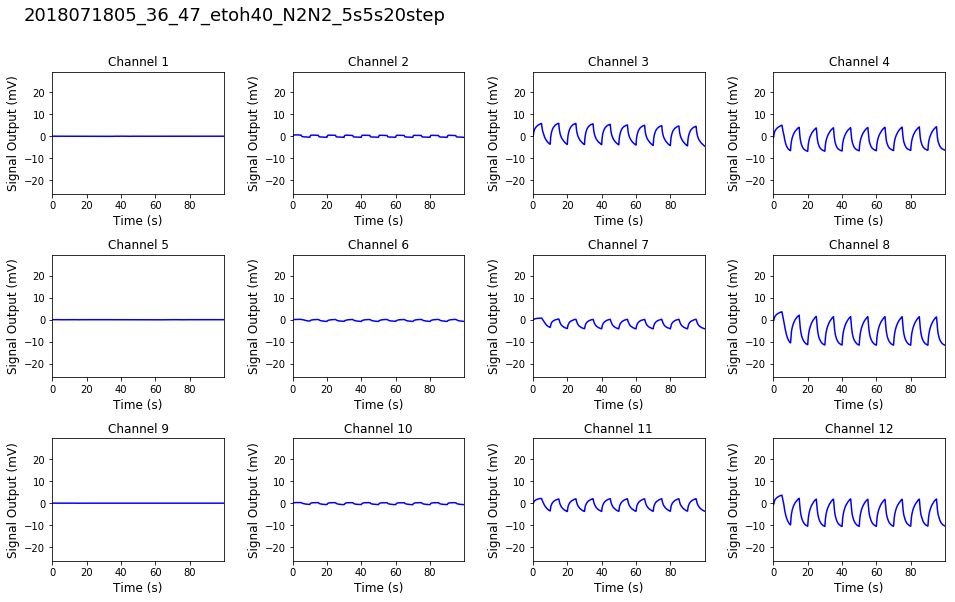

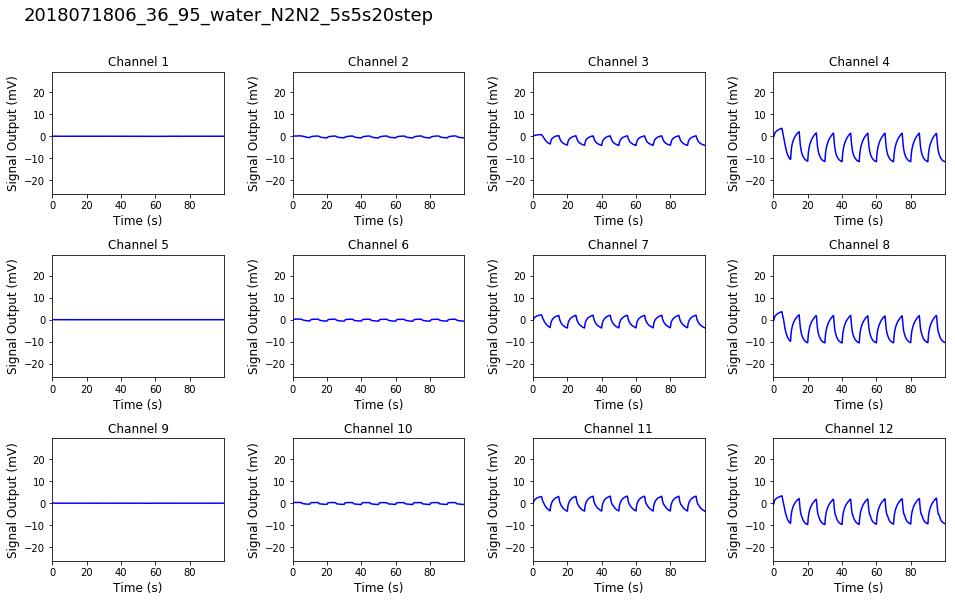

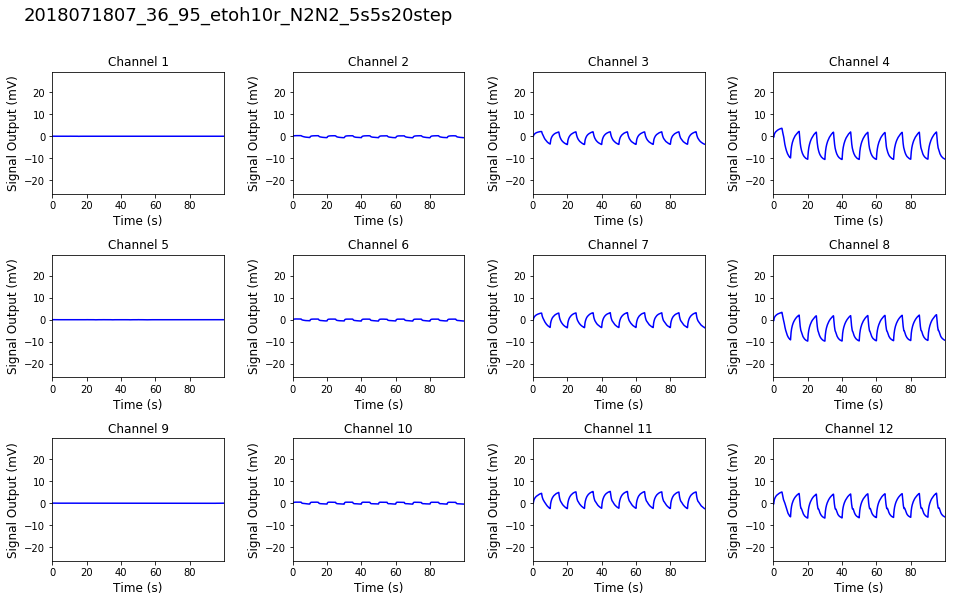

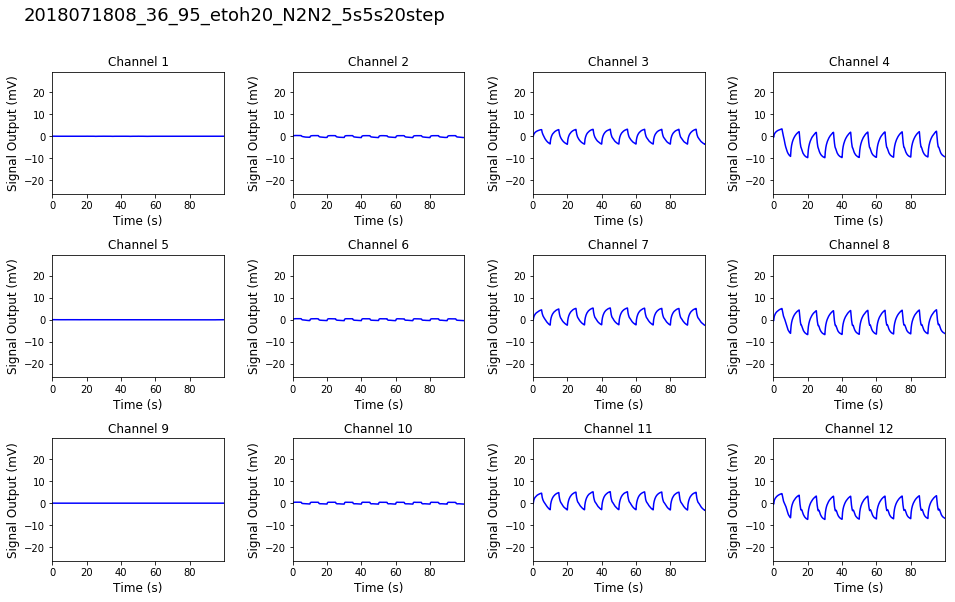

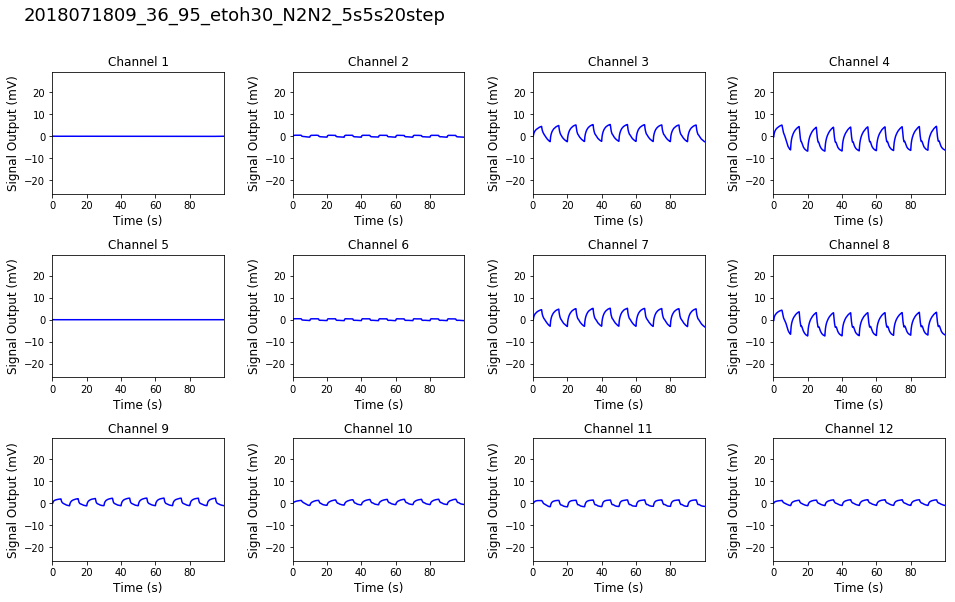

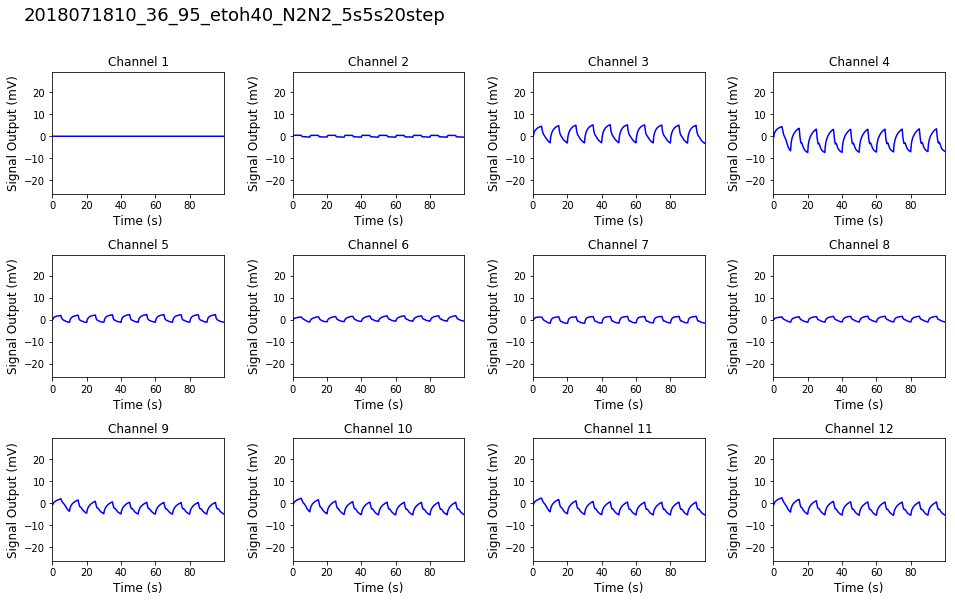

In [18]:
fontsize1=12
labelsize=10

df = pd.read_csv(f1[0], skiprows=19, nrows=19999)
dfsm = pd.DataFrame(df.iloc[:,0])

yimin=[]
yimax=[]
for k in range(len(f1)):
    dfk = pd.read_csv(f1[k], skiprows=19, nrows=19999)
    for i in range(12):
        yi = dfk.iloc[:,i+1]-dfk.iloc[0,i+1]
        dfsm[4*k+i+1] = yi
        yimin.append(yi.min())
        yimax.append(yi.max())

ymin = min(yimin)
ymax = max(yimax)
yrng = ymax - ymin

#fig = plt.figure(figsize=(16,9))
#plt.subplots_adjust(hspace=0.5, wspace=0.4)

x = dfsm.iloc[:,0]

for k in range(len(f1)):
    fig = plt.figure(figsize=(16,9))
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title('Channel '+str(i+1), fontsize=12)
        plt.plot(x,dfsm.iloc[:,4*k+i+1], 'b')
        plt.xlabel('Time (s)', fontsize=fontsize1)
        plt.ylabel('Signal Output (mV)', fontsize=fontsize1)
        plt.xlim([0,100])
        plt.xticks(np.arange(0,100,20))
        plt.ylim([ymin-yrng*0.1,ymax+yrng*0.1])
        plt.tick_params(labelsize =labelsize)

    fig.suptitle(f2[k], ha='left', x=0.1, fontsize=18)
    plt.savefig(path1+f2[k]+'_scaled.png', format='png')


25
